In [1]:
!pip install --upgrade pip
!pip install \
  pandas numpy \
  spacy nltk \
  matplotlib plotly \
  transformers sentence-transformers \
  umap-learn hdbscan \
  rake-nltk \
  streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 154.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 193.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 198.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 69

In [2]:
from google.colab import files

# Upload the Reviews.csv file from your computer
uploaded = files.upload()


Saving Reviews.csv to Reviews.csv


In [3]:
import pandas as pd

# Read first 50k rows for quick inspection
df = pd.read_csv('Reviews.csv', nrows=50000)

# Display shape, columns, info and first 5 rows
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.head()


Shape: (50000, 10)
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49995 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Step 3: select and prepare relevant columns
use_cols = ['Score', 'Summary', 'Text', 'Time']
df = df[use_cols].copy()

# convert UNIX timestamp to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# check shape and preview
print("Shape:", df.shape)
df.head()


Shape: (50000, 4)


,Score,Summary,Text,Time
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


In [5]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 113.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import spacy
# загружаем модель, отключив parser и ner для скорости
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])


In [7]:
def preprocess(text: str) -> str:
    """
    1) to lowercase
    2) tokenize & lemmatize via spaCy
    3) keep only alphabetic tokens, drop stopwords
    4) join lemmas back to string
    """
    doc = nlp(text.lower())
    lemmas = [token.lemma_ for token in doc
              if token.is_alpha and not token.is_stop]
    return " ".join(lemmas)


In [8]:
import pandas as pd

sample = df['Text'].head(5)
cleaned = sample.apply(preprocess)

pd.DataFrame({
    'original': sample,
    'cleaned': cleaned
})


,original,cleaned
0,I have bought several of the Vitality canned d...,buy vitality can dog food product find good qu...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...
2,This is a confection that has been around a fe...,confection century light pillowy citrus gelati...
3,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [9]:
from tqdm.auto import tqdm

# Prepare list of raw texts
texts = df['Text'].tolist()

# This list will hold the cleaned versions
cleaned_texts = []

# Allow spaCy to process longer docs if needed
nlp.max_length = max(len(t) for t in texts) + 100

# Process in batches for speed
for doc in tqdm(nlp.pipe(texts, batch_size=200, n_process=2), total=len(texts)):
    # Keep only alphabetic lemmas, drop stop words
    lemmas = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    cleaned_texts.append(" ".join(lemmas))

# Attach cleaned column to DataFrame
df['cleaned'] = cleaned_texts

# Preview first 5 rows
df[['Text','cleaned']].head()


  0%|          | 0/50000 [00:00<?, ?it/s]

,Text,cleaned
0,I have bought several of the Vitality canned d...,buy Vitality can dog food product find good qu...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label Jumbo Salted Peanuts pean...
2,This is a confection that has been around a fe...,confection century light pillowy citrus gelati...
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe find...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [10]:
# Step 5: Sentiment Analysis with VADER on a sample
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ensure vader lexicon is available
nltk.download('vader_lexicon')

# initialize analyzer
sia = SentimentIntensityAnalyzer()

# take a random sample of 10 000 reviews for speed
df_sample = df.sample(n=10000, random_state=42).reset_index(drop=True)

# compute compound score
df_sample['vader_compound'] = df_sample['cleaned'].apply(lambda x: sia.polarity_scores(x)['compound'])

# assign positive/negative labels
df_sample['vader_label'] = df_sample['vader_compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')

# show distribution
counts = df_sample['vader_label'].value_counts().reset_index()
counts.columns = ['label', 'count']
counts


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,label,count
0,positive,9268
1,negative,732


In [11]:
import plotly.express as px

# Build bar chart of VADER labels
fig = px.bar(
    counts,
    x='label',
    y='count',
    title='VADER Sentiment Distribution (10 000 Reviews)',
    labels={'label':'Sentiment', 'count':'Number of Reviews'}
)

fig.show()


In [14]:

!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy
# Load full English model (with parser & NER)
nlp = spacy.load('en_core_web_sm')


In [16]:
from collections import Counter

def extract_spacy_keyphrases(text, top_n=5):
    """
    Extract noun-chunk keyphrases via spaCy parser.
    Returns the top_n most frequent noun chunks.
    """
    doc = nlp(text)
    chunks = [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) > 1]
    return [phrase for phrase,_ in Counter(chunks).most_common(top_n)]

# Apply to your sample DataFrame
df_sample['keyphrases'] = df_sample['cleaned'].apply(lambda txt: extract_spacy_keyphrases(txt, 5))

# Show the first 5 results
df_sample[['cleaned','keyphrases']].head()


,cleaned,keyphrases
0,favorite blend k cup exploder far italian medi...,"[favorite blend k cup, far italian medium stro..."
1,coffee light medium roast think purchase good ...,"[coffee light medium roast, good value purchase]"
2,huge supply work plenty spare effective buy gr...,[huge supply work]
3,buy box disappear fast Bahlsen Biscuits elegan...,"[buy box, fast Bahlsen Biscuits elegant impres..."
4,cookie good taste well GF product yes crumble ...,"[cookie good taste, GF product, yes crumble de..."


In [17]:
import plotly.io as pio
# Use the Colab renderer for Plotly
pio.renderers.default = 'colab'

from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import plotly.express as px

# 1. Load lightweight sentence-transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Encode the cleaned texts of our sample
embeddings = model.encode(df_sample['cleaned'].tolist(), show_progress_bar=True)

# 3. Reduce to 2 dimensions with UMAP
umap_embeds = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)

# 4. Cluster with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
df_sample['cluster'] = clusterer.fit_predict(umap_embeds)

# 5. Plot the clusters
fig = px.scatter(
    x=umap_embeds[:,0],
    y=umap_embeds[:,1],
    color=df_sample['cluster'].astype(str),
    title='UMAP Projection of Review Clusters',
    labels={'color':'Cluster'}
)
fig.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



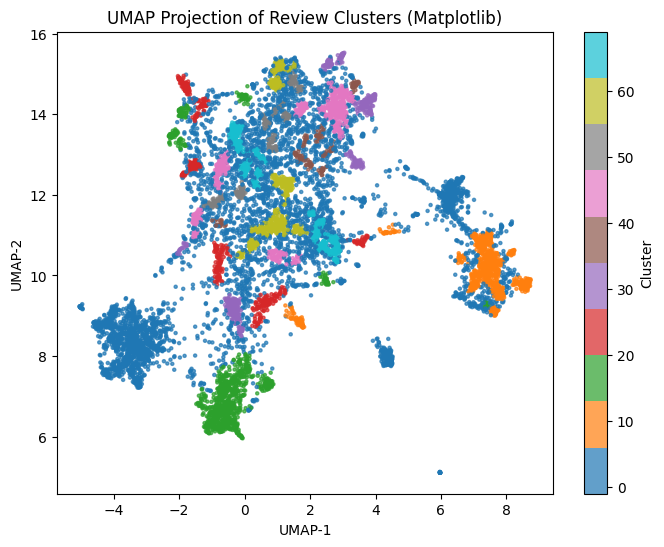

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    umap_embeds[:,0],
    umap_embeds[:,1],
    c=df_sample['cluster'],
    cmap='tab10',
    s=5,
    alpha=0.7
)
plt.title('UMAP Projection of Review Clusters (Matplotlib)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster')
plt.show()
